IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [5]:
# For plot style
sns.set(style='whitegrid')

LOAD DATA

In [8]:
df = pd.read_csv("Weather dataset.csv")

DATA PREPROCESSING

In [11]:
# Convert 'date_time' to datetime
df['date_time'] = pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')

In [13]:
# Encode target variable 'Rainfall' (Yes=1, No=0)
df['Rainfall'] = df['Rainfall'].map({'Yes': 1, 'No': 0})

In [15]:
# Drop non-numeric or non-useful columns
df.drop(columns=['location'], inplace=True)

In [19]:
# Check for missing values and handle them
df.ffill(inplace=True)

VISUALIZATION

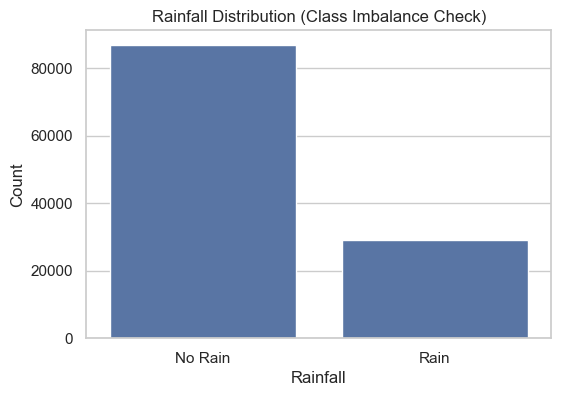

In [22]:
#Rainfall Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Rainfall', data=df)
plt.title("Rainfall Distribution (Class Imbalance Check)")
plt.xticks([0, 1], ['No Rain', 'Rain'])
plt.ylabel("Count")
plt.show()

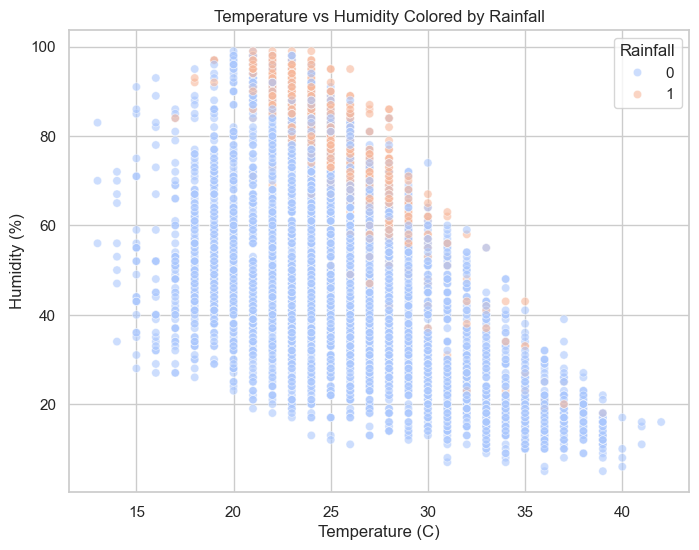

In [24]:
#Temperature vs Humidity (Color by Rain)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df.sample(5000), x='tempC', y='humidity', hue='Rainfall', palette='coolwarm', alpha=0.6)
plt.title("Temperature vs Humidity Colored by Rainfall")
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity (%)")
plt.legend(title="Rainfall")
plt.show()

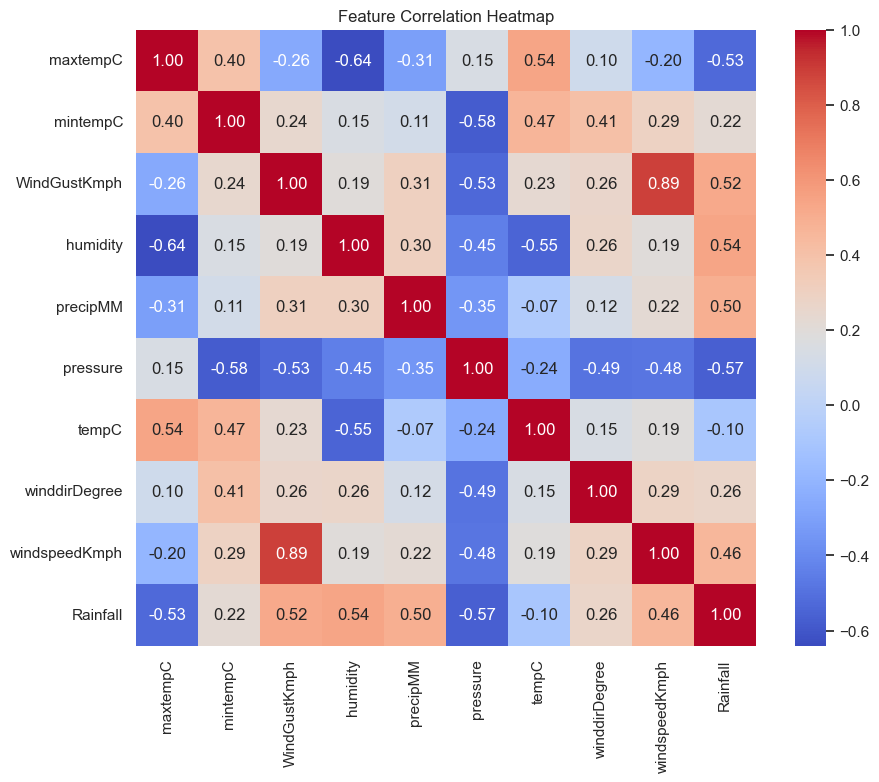

In [30]:
#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(columns='date_time').corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

C:\Users\vaish\AppData\Local\Temp\ipykernel_5584\1095693139.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('date_time')['Rainfall'].resample('M').mean().plot(figsize=(12, 4))


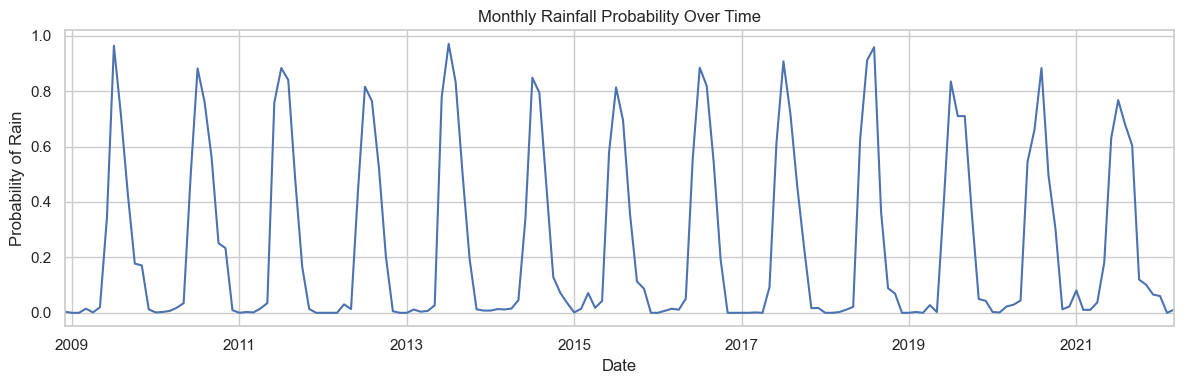

In [31]:
#Time Series Rainfall Trend
df.set_index('date_time')['Rainfall'].resample('M').mean().plot(figsize=(12, 4))
plt.title("Monthly Rainfall Probability Over Time")
plt.ylabel("Probability of Rain")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


SPLIT DATA

In [35]:
X = df.drop(['Rainfall', 'date_time'], axis=1)
y = df['Rainfall']

In [37]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SCALING FEATURES

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TRAIN MODEL

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

EVALUATE MODEL

In [48]:
y_pred = model.predict(X_test_scaled)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 1.0

Confusion Matrix:
 [[17323     0]
 [    0  5905]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     17323
           1       1.00      1.00      1.00      5905

    accuracy                           1.00     23228
   macro avg       1.00      1.00      1.00     23228
weighted avg       1.00      1.00      1.00     23228



FEATURE IMPORTANCE

C:\Users\vaish\AppData\Local\Temp\ipykernel_5584\2988263188.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


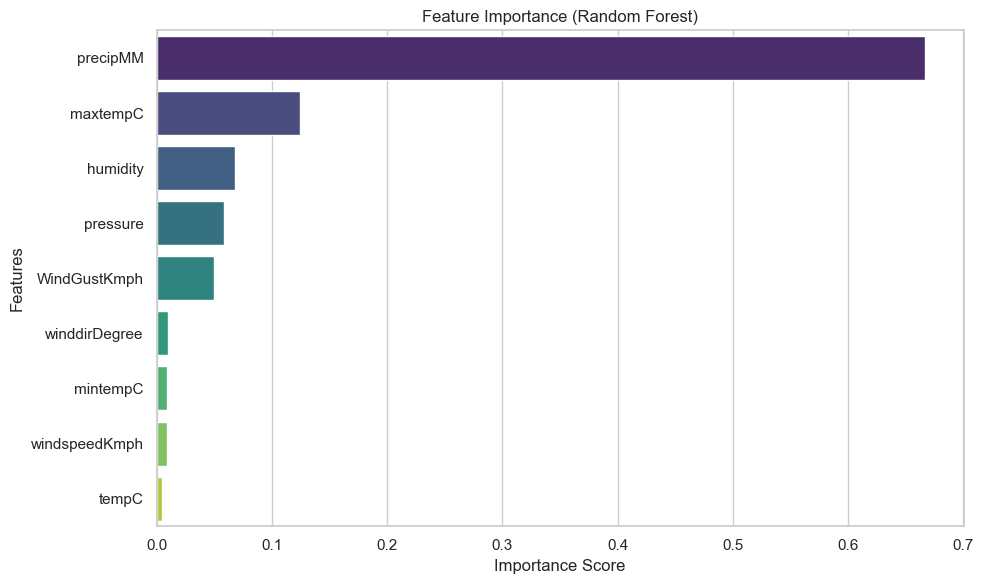

In [51]:
importances = model.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

PREDICTION EXAMPLE

In [54]:
sample = X_test.iloc[0:1]
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)
print("\nSample Prediction (1=Rain, 0=No Rain):", prediction)


Sample Prediction (1=Rain, 0=No Rain): [1]
